<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP2_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1: Reservas de Hotel

## 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

      ➢ Torraca Lautaro - 108813
      ➢ Negrotti Gianluca - 108184
      ➢ Marco Tosi - 107237

### » Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from google.colab import files
import scipy.stats as st

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# » Lectura de los archivos

In [ ]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_train.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/df_base_limpio.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

# » Analisis del DataSet de train


Realizamos un breve analizis sobre el dataset para ver valores atipicos y/o valores nulos los cuales no queremos tenerlos en cuenta.

### » Muestra del DataSet de Train


In [ ]:
ds_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


#### - **Cantidad de columnas y filas**

In [ ]:
ds_train.shape

(61913, 31)

### » Tipos de las varibales

In [ ]:
ds_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

### » Separación de variables cuantitativas

In [ ]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = ds_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.25,78.0,0.0,629.0
arrival_date_week_number,27.22,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.86,2.0,2.0,55.0
children,0.10,0.0,0.0,10.0
babies,0.01,0.0,0.0,9.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.11,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.20,0.0,0.0,17.0


### » Separación de las variables cualitativas

In [ ]:
nombre_variables_cualitativas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'distribution_channel', 'assigned_room_type',
                                 'deposit_type', 'customer_type']

ds_cualitativo = ds_train.loc[:, nombre_variables_cualitativas]

### » Cantidad de valores que admiten las varibles cualitativas.

In [ ]:
ds_cualitativo.nunique().sort_values(ascending=True)

hotel                     2
deposit_type              3
customer_type             4
meal                      5
distribution_channel      5
market_segment            8
reserved_room_type       10
arrival_date_month       12
assigned_room_type       12
country                 149
dtype: int64

### » Frecuencia de los valores

- **Hoteles.**

In [ ]:
round(ds_cualitativo.hotel.value_counts(normalize=True) * 100, 2)

City Hotel      68.05
Resort Hotel    31.95
Name: hotel, dtype: float64


- **Tipo de depósito.**

In [ ]:
round(ds_cualitativo.deposit_type.value_counts(normalize=True) * 100, 2)

No Deposit    83.48
Non Refund    16.39
Refundable     0.13
Name: deposit_type, dtype: float64

tiene Undefined


- **Canal de distribución.**

In [ ]:
round(ds_cualitativo.distribution_channel.value_counts(normalize=True) * 100, 2)

TA/TO        83.74
Direct       10.98
Corporate     5.12
GDS           0.14
Undefined     0.01
Name: distribution_channel, dtype: float64

- **Tipo de cliente.**

In [ ]:
round(ds_cualitativo.customer_type.value_counts(normalize=True) * 100, 2)

Transient          76.64
Transient-Party    19.65
Contract            3.28
Group               0.42
Name: customer_type, dtype: float64

- **Comida.**

In [ ]:
round(ds_cualitativo.meal.value_counts(normalize=True) * 100, 2)

BB           77.26
HB           12.04
SC            8.97
Undefined     0.95
FB            0.77
Name: meal, dtype: float64

tiene Undefined

- **Segmento de mercado (método de reserva).**

In [ ]:
round(ds_cualitativo.market_segment.value_counts(normalize=True) * 100, 3)

Online TA        47.274
Offline TA/TO    20.002
Groups           18.647
Direct            9.299
Corporate         4.012
Complementary     0.580
Aviation          0.183
Undefined         0.003
Name: market_segment, dtype: float64

- **Mes de llegada**

In [ ]:
round(ds_cualitativo.arrival_date_month.value_counts(normalize=True) * 100, 2)

August       11.59
July         10.54
May           9.95
April         9.49
October       9.47
June          9.32
September     9.08
March         7.91
February      6.66
December      5.64
November      5.50
January       4.85
Name: arrival_date_month, dtype: float64

- **País**

In [ ]:
ds_cualitativo.country.value_counts(normalize=True) * 100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

### » Separacion de las variables ordinales

In [ ]:
nombre_variables_ordinales = ['reserved_room_type', 'assigned_room_type']

ds_ordinales = ds_train.loc[:, nombre_variables_ordinales]

- **Tipo de habitación reservada.**

In [ ]:
round(ds_ordinales.reserved_room_type.value_counts(normalize=True) * 100, 3)

A    72.899
D    15.481
E     5.248
F     2.344
G     1.761
B     0.937
C     0.779
H     0.539
P     0.011
L     0.002
Name: reserved_room_type, dtype: float64

- **Tipo de habitación asignada**

In [ ]:
round(ds_ordinales.assigned_room_type.value_counts(normalize=True) * 100, 3)

A    64.618
D    19.689
E     6.104
F     2.941
G     2.063
C     1.820
B     1.706
H     0.620
I     0.234
K     0.192
P     0.011
L     0.002
Name: assigned_room_type, dtype: float64

# » Analisis de nulos en el DataSet

In [ ]:
ds_train.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


# » Valores atipicos e imputaciones.


Luego de analizar los valores mostrados anteriormente procedemos a eliminar los valores que consideramos como outsiders.

In [ ]:
df_train.shape

(61913, 31)

- **Adulto**

In [ ]:
df_train = df_train[(df_train['adults'] <= 6) & (df_train['adults'] >= 1)]
df_train.shape

(61708, 31)

- **Hijos**


In [ ]:
df_train = df_train[(df_train['children'] <= 4) & (df_train['children'] >= 0)]
df_train.shape

(61703, 31)

- **Bebes**

Filtrado de los datos

In [ ]:
df_train = df_train[(df_train['babies'] <= 3) & (df_train['babies'] >= 0)]
df_train.shape

(61702, 31)

- **Playas de estacionamientos**

In [ ]:
df_train = df_train[(df_train['required_car_parking_spaces'] <= 3) & (df_train['required_car_parking_spaces'] >= 0)]
df_train.shape

(61701, 31)

In [ ]:

df_train['z_adr']=st.zscore(df_train.adr)
df_train['z_total_of_special_requests']=st.zscore(df_train.total_of_special_requests)
df_train['z_stays_in_weekend_nights']=st.zscore(df_train.stays_in_weekend_nights)

df_train['z_required_car_parking_spaces']=st.zscore(df_train.required_car_parking_spaces)
df_train['z_adults']=st.zscore(df_train.adults)
df_train['z_babies']=st.zscore(df_train.babies)


columns_and_zscores = {
    'adr':'z_adr',
    'total_of_special_requests': 'z_total_of_special_requests',
    'stays_in_weekend_nights': 'z_stays_in_weekend_nights',
    'required_car_parking_spaces': 'z_required_car_parking_spaces',
    'adults': 'z_adults',
    'babies': 'z_babies'}


for col, zscore_col in columns_and_zscores.items():

    df_train.loc[df_train[zscore_col] > 3.3, col] = None
    df_train[col].dropna()
for col, zscore_col in columns_and_zscores.items():

    df_train.loc[df_train[zscore_col] < -3.3, col] = None
    df_train[col].dropna()



df_train = df_train.drop(columns=list(columns_and_zscores.values()))

## - **Muestra del DataSet limpio**

In [ ]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = df_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.27,78.0,0.0,629.00
arrival_date_week_number,27.21,28.0,33.0,53.00
stays_in_weekend_nights,0.91,1.0,0.0,4.00
adults,1.86,2.0,2.0,3.00
children,0.10,0.0,0.0,3.00
babies,0.00,0.0,0.0,0.00
is_repeated_guest,0.03,0.0,0.0,1.00
previous_cancellations,0.12,0.0,0.0,26.00
previous_bookings_not_canceled,0.12,0.0,0.0,70.00
booking_changes,0.19,0.0,0.0,17.00


### » Ingeniería de Features

In [ ]:
ds_trabajo_train = ds_train.copy()
ds_trabajo_test = ds_test.copy()

df_trabajo_train = pd.DataFrame(ds_trabajo_train)
df_trabajo_test = pd.DataFrame(ds_trabajo_test)

In [ ]:
df_trabajo_test.isna().sum()

Unnamed: 0                            0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              95
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3363
company                           25218


In [ ]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}


In [ ]:
df_trabajo_train['total_guests'] = df_trabajo_train['adults'] + df_trabajo_train['children']
df_trabajo_test['total_guests'] = df_trabajo_test['adults'] + df_trabajo_test['children']

df_trabajo_train['room_type_match'] = df_trabajo_train['assigned_room_type'] == df_trabajo_train['reserved_room_type']
df_trabajo_test['room_type_match'] = df_trabajo_test['assigned_room_type'] == df_trabajo_test['reserved_room_type']

df_trabajo_train['days_in_waiting_list'] = ds_trabajo_train['days_in_waiting_list'] >= 0

df_trabajo_train['cancel_to_noncancel_ratio'] = df_trabajo_train['previous_cancellations'] / (1 + df_trabajo_train['previous_bookings_not_canceled'])
df_trabajo_test['cancel_to_noncancel_ratio'] = df_trabajo_test['previous_cancellations'] / (1 + df_trabajo_test['previous_bookings_not_canceled'])

df_trabajo_train['lead_time_category'] = pd.cut(df_trabajo_train['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_trabajo_test['lead_time_category'] = pd.cut(df_trabajo_test['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

df_trabajo_train['days_in_waiting_list_category'] = pd.cut(df_trabajo_train['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_trabajo_test['days_in_waiting_list_category'] = pd.cut(df_trabajo_test['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

In [ ]:
df_trabajo_test['arrival_date_month'] = df_trabajo_test['arrival_date_month'].map(month_to_number)
df_trabajo_train['arrival_date_month'] = df_trabajo_train['arrival_date_month'].map(month_to_number)

In [ ]:
df_trabajo_test['Fecha'] = df_trabajo_test.apply(lambda row: str(row['arrival_date_year']) + '-' + str(row['arrival_date_month']) + '-' + str(row['arrival_date_day_of_month']), axis=1)
df_trabajo_test['Fecha'] = pd.to_datetime(df_trabajo_test['Fecha'])

In [ ]:
df_trabajo_test['DoY'] = df_trabajo_test['Fecha'].dt.dayofyear

df_trabajo_train['Fecha'] = df_trabajo_train.apply(lambda row: str(row['arrival_date_year']) + '-' + str(row['arrival_date_month']) + '-' + str(row['arrival_date_day_of_month']), axis=1)
df_trabajo_train['Fecha'] = pd.to_datetime(df_trabajo_train['Fecha'])

df_trabajo_train['DoY'] = df_trabajo_train['Fecha'].dt.dayofyear

df_trabajo_train['dif'] = df_trabajo_train['DoY'].apply(lambda x: min((366 - x), (x - 1)))
df_trabajo_test['dif'] = df_trabajo_test['DoY'].apply(lambda x: min((366 - x), (x - 1)))

df_trabajo_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,id,is_canceled,total_guests,room_type_match,cancel_to_noncancel_ratio,lead_time_category,days_in_waiting_list_category,Fecha,DoY,dif
0,City Hotel,49,2016,9,37,5,1,2,1,0.0,...,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,1.0,True,0.0,Short,Very Short,2016-09-05,249,117
1,Resort Hotel,4,2015,10,44,31,0,1,2,0.0,...,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2.0,True,0.0,Very Short,Very Short,2015-10-31,304,62
2,City Hotel,25,2016,10,42,13,0,1,2,2.0,...,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,4.0,True,0.0,Short,Very Short,2016-10-13,287,79
3,City Hotel,26,2016,12,51,12,2,5,2,0.0,...,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2.0,True,0.0,Short,Very Short,2016-12-12,347,19
4,City Hotel,104,2017,3,12,19,2,5,2,0.0,...,28c75445-c603-413a-babf-ad377018b592,0,2.0,True,0.0,Long,Very Short,2017-03-19,78,77


# »  Preparacion de los DataSets

Procedemos a preparar ambos DataSets para poder entrenar y predecir.

- Analizamos la cantidad de columnas y filas



In [ ]:
print('Train:', df_trabajo_train.shape)
print('Test:', df_trabajo_test.shape)

Train: (61913, 39)
Test: (26535, 44)


Buscamos las columans que no coinciden en ambos DataSets


In [ ]:
columnas_faltantes_en_train = set(df_trabajo_test.columns) - set(df_trabajo_train.columns)
columnas_faltantes_en_test = set(df_trabajo_train.columns)- set(df_trabajo_test.columns)
print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)

print('Train:', df_trabajo_train.shape)
print('Test:', df_trabajo_test.shape)

Columnas faltantes es train: {'z_stays_in_weekend_nights', 'z_total_of_special_requests', 'Unnamed: 0', 'mahalanobis', 'reservation_status_date', 'z_adr'}
Columnas faltantes es test: {'is_canceled'}
Train: (61913, 39)
Test: (26535, 44)


Vemos que el dataSet de test tiene una columan de mas que no se encuentra en train, por lo que prodecemos a eliminarla ya que creemos que no es relevante para el calculo del is_canceled.



#### - **Arreglo del DataSet de test**

Debemos eliminar las columnas que unicamenten faltan el train y agregar las que faltan en test ya que deben tener las mismas columnas con los mismos nombres.

In [ ]:
columna_a_eliminar_test = 'reservation_status_date'

df_trabajo_test.drop(columna_a_eliminar_test, axis='columns', inplace = True)
df_trabajo_test.insert(1, 'is_canceled', " ")
df_trabajo_test = pd.DataFrame(df_trabajo_test)
df_trabajo_test.head()

,Unnamed: 0,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,z_stays_in_weekend_nights,mahalanobis,total_guests,room_type_match,cancel_to_noncancel_ratio,lead_time_category,days_in_waiting_list_category,Fecha,DoY,dif
0,0,,City Hotel,277,2016,11,46,7,1,2,...,0.070936,0.128029,2.0,True,0.0,Long,Very Short,2016-11-07,312,54
1,1,,City Hotel,286,2016,5,20,11,0,4,...,-0.923404,2.076075,2.0,True,0.0,Long,Long,2016-05-11,132,131
2,2,,City Hotel,0,2016,8,35,23,0,1,...,-0.923404,1.344047,3.0,True,0.0,Very Short,Very Short,2016-08-23,236,130
3,3,,Resort Hotel,196,2016,10,44,29,2,5,...,1.065276,2.805266,4.0,True,0.0,Long,Very Short,2016-10-29,303,63
4,4,,Resort Hotel,232,2016,11,48,26,2,1,...,1.065276,3.038915,2.0,True,0.0,Long,Very Short,2016-11-26,331,35


### - **Seleccion de columnas utiles para la prediccion**

- Buscamos datos faltantes y procedemos a tomar decisiones sobre que hacer con estos datos faltantes

In [ ]:
filas_totales=ds_trabajo_train.shape[0]
print(ds_trabajo_train.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

In [ ]:
df_trabajo_train.shape

(61913, 39)

In [ ]:
df_trabajo_train.dropna(subset=['children'], inplace=True)

df_trabajo_train.dropna(subset=['agent'], inplace=True)

df_trabajo_train.shape



(54021, 39)

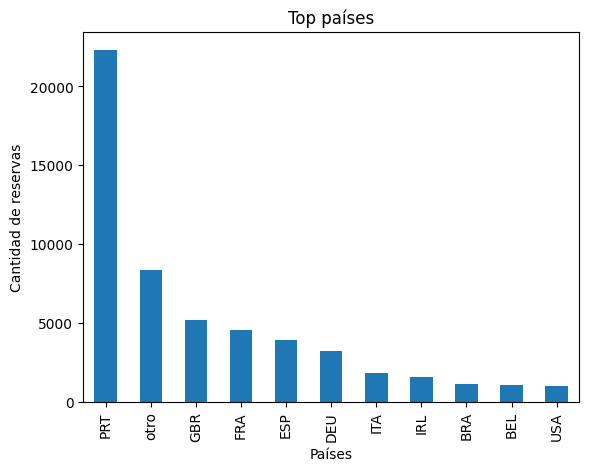

In [ ]:
country_counts_train = df_trabajo_train['country'].value_counts()
country_counts_test = df_trabajo_test['country'].value_counts()

# Selecciona los 10 países más relevantes
top_10_countries_train = country_counts_train.head(10).index.tolist()
top_10_countries_test = country_counts_test.head(10).index.tolist()

# Reemplaza los países que no están en los 10 más relevantes con "otro"
df_trabajo_train['country'] = df_trabajo_train['country'].apply(lambda x: x if x in top_10_countries_train else 'otro')
df_trabajo_test['country'] = df_trabajo_test['country'].apply(lambda x: x if x in top_10_countries_test else 'otro')

paises = df_trabajo_train['country'].value_counts().plot.bar(alpha=1, title="Top países", xlabel='Países', ylabel='Cantidad de reservas')

In [ ]:
market_segment_counts_train = df_trabajo_train['market_segment'].value_counts()
market_segment_counts_test = df_trabajo_test['market_segment'].value_counts()


top_3_ms_train = market_segment_counts_train.head(4).index.tolist()
top_3_ms_test = market_segment_counts_test.head(4).index.tolist()

df_trabajo_train['market_segment'] = df_trabajo_train['market_segment'].apply(lambda x: x if x in top_3_ms_train else 'otro')
df_trabajo_test['market_segment'] = df_trabajo_test['market_segment'].apply(lambda x: x if x in top_3_ms_test else 'otro')


In [ ]:
ct_counts_train = df_trabajo_train['customer_type'].value_counts()
ct_counts_test = df_trabajo_test['customer_type'].value_counts()


top_ct_train = ct_counts_train.head(2).index.tolist()
top_ct_test = ct_counts_test.head(2).index.tolist()

df_trabajo_train['customer_type'] = df_trabajo_train['customer_type'].apply(lambda x: x if x in top_ct_train else 'otro')
df_trabajo_test['customer_type'] = df_trabajo_test['customer_type'].apply(lambda x: x if x in top_ct_test else 'otro')


Verificamos la existencia de NaNs de nuevo.

In [ ]:
filas_totales = df_trabajo_train.shape[0]
print(df_trabajo_train.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

» Matriz de correlacion

Sera utilizada para analizar posibles columnas utiles para el calculo de la columnas is_canceled

In [ ]:
df_trabajo_train.drop(columns = ['days_in_waiting_list'], axis = 1, inplace = True)
df_trabajo_train.shape

(54021, 38)

<Axes: >

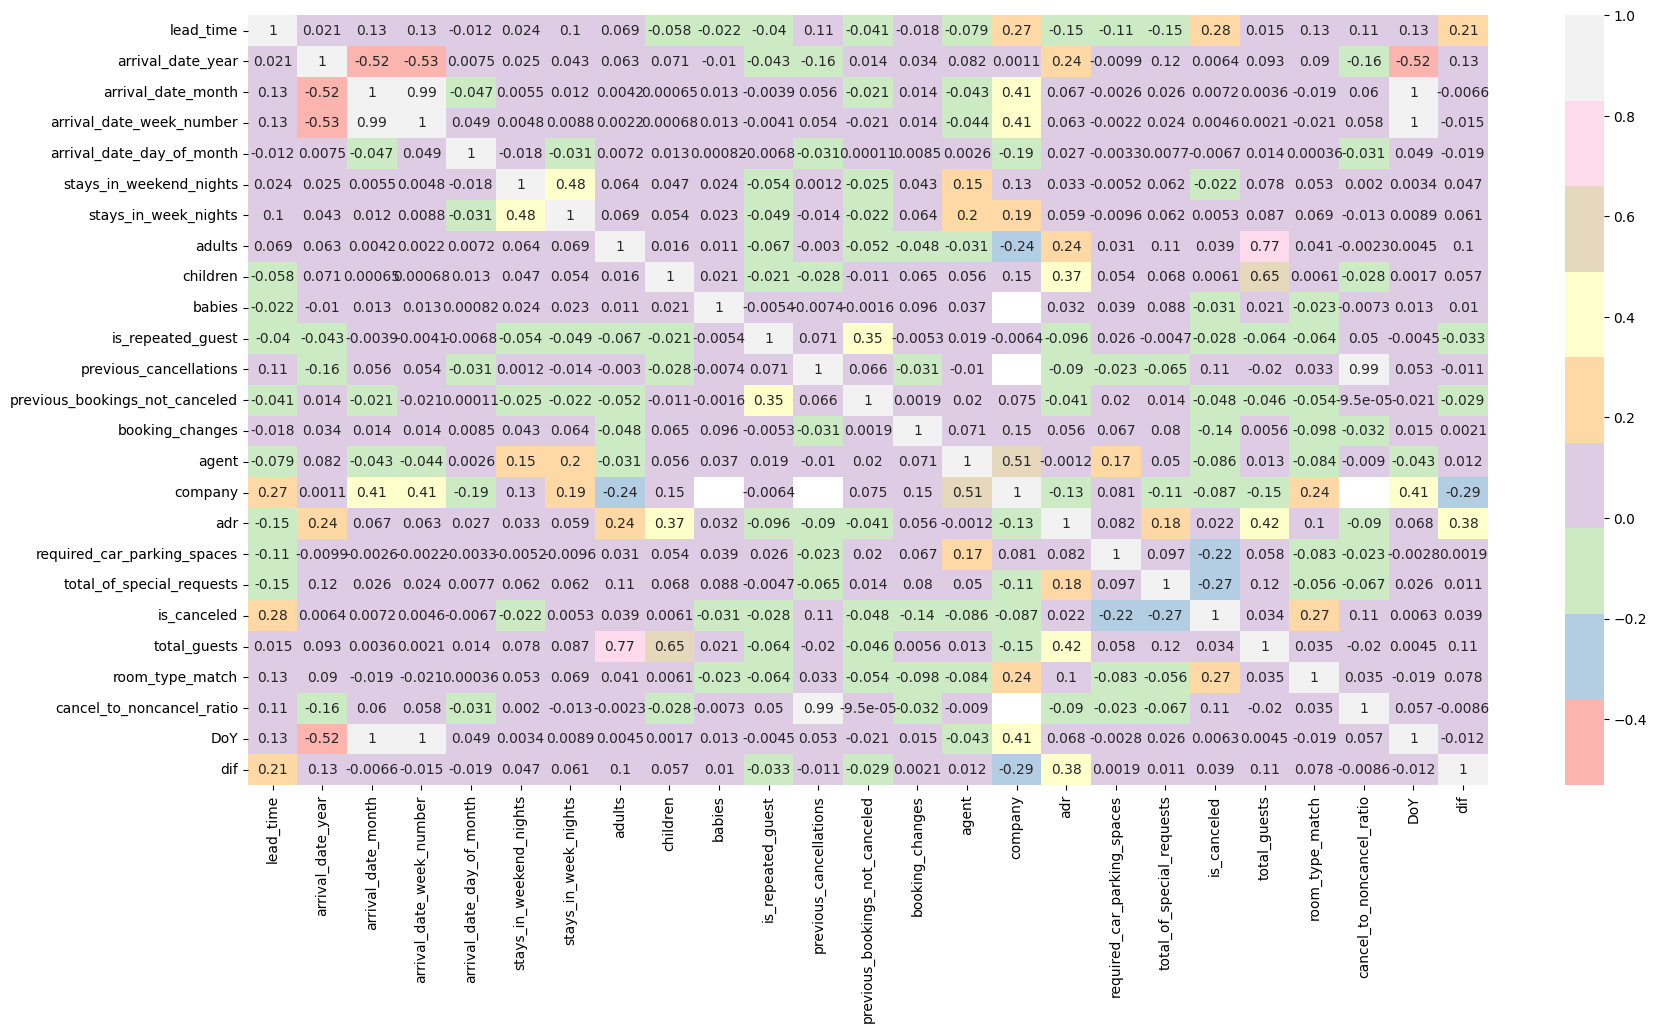

In [ ]:

plt.figure(figsize = (20,10))
sns.heatmap(df_trabajo_train.corr(numeric_only = True),annot = True, cmap= "Pastel1")

### » Entramiento y prediccion con el primer modelo de arbol planteado. (Modelo 1)

Procedemos a buscar los paises que se encuentran en ambos DataSets y hacemos que coincidan los de train con los de test.

In [ ]:

features1 = ['lead_time_category','booking_changes','required_car_parking_spaces','total_of_special_requests','room_type_match','cancel_to_noncancel_ratio', 'is_repeated_guest',
             'previous_cancellations','country', 'market_segment', 'deposit_type', 'distribution_channel', 'stays_in_weekend_nights', 'adults','babies', 'days_in_waiting_list_category',
             'customer_type','is_canceled','id']

df_trabajo_train1 = df_trabajo_train[features1]
df_trabajo_test1 = df_trabajo_test[features1]

- **Dummies a las columnas de los DataSets**

In [ ]:
columns_to_dum1= ['lead_time_category', 'country', 'market_segment', 'deposit_type', 'distribution_channel', 'days_in_waiting_list_category', 'customer_type']

In [ ]:
df_trabajo_train_dum1 = pd.get_dummies(df_trabajo_train1, columns = columns_to_dum1)
df_trabajo_train_dum1.head(5)

,booking_changes,required_car_parking_spaces,total_of_special_requests,room_type_match,cancel_to_noncancel_ratio,is_repeated_guest,previous_cancellations,stays_in_weekend_nights,adults,babies,...,distribution_channel_GDS,distribution_channel_TA/TO,days_in_waiting_list_category_Very Short,days_in_waiting_list_category_Short,days_in_waiting_list_category_Medium,days_in_waiting_list_category_Long,days_in_waiting_list_category_Very Long,customer_type_Transient,customer_type_Transient-Party,customer_type_otro
0,0,0,1,True,0.0,0,0,1,1,0,...,0,1,1,0,0,0,0,1,0,0
2,0,0,2,True,0.0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,0,0
3,0,0,0,True,0.0,0,0,2,2,0,...,0,1,1,0,0,0,0,1,0,0
4,0,0,1,True,0.0,0,0,2,2,0,...,0,1,1,0,0,0,0,0,1,0
6,1,0,1,True,0.0,0,0,4,2,0,...,0,1,1,0,0,0,0,0,0,1


In [ ]:
df_trabajo_test_dum1 = pd.get_dummies(df_trabajo_test1, columns = columns_to_dum1 )
df_trabajo_test_dum1.head()

,booking_changes,required_car_parking_spaces,total_of_special_requests,room_type_match,cancel_to_noncancel_ratio,is_repeated_guest,previous_cancellations,stays_in_weekend_nights,adults,babies,...,distribution_channel_GDS,distribution_channel_TA/TO,days_in_waiting_list_category_Very Short,days_in_waiting_list_category_Short,days_in_waiting_list_category_Medium,days_in_waiting_list_category_Long,days_in_waiting_list_category_Very Long,customer_type_Transient,customer_type_Transient-Party,customer_type_otro
0,0,0,0,True,0.0,0,0,1,2,0,...,0,1,1,0,0,0,0,1,0,0
1,0,0,0,True,0.0,0,0,0,2,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,2,True,0.0,0,0,0,3,0,...,0,1,1,0,0,0,0,1,0,0
3,0,0,0,True,0.0,0,0,2,2,0,...,0,1,1,0,0,0,0,1,0,0
4,0,0,0,True,0.0,0,0,2,2,0,...,0,1,1,0,0,0,0,1,0,0


- **Entrenamiento del arbol1**

In [ ]:

df_trabajo_x1= df_trabajo_train_dum1.drop(['is_canceled', 'id'], axis='columns', inplace=False)

df_trabajo_y1 = df_trabajo_train_dum1['is_canceled'].copy()

x_train1, x_test1, y_train1, y_test1= train_test_split(df_trabajo_x1,
                                                       df_trabajo_y1,
                                                       test_size=0.30,
                                                       random_state=13)


In [ ]:
tree_model1 = tree.DecisionTreeClassifier(criterion = 'gini',
                                          max_depth = 25,
                                          min_samples_leaf = 10,
                                          ccp_alpha = 0)

In [ ]:
model1 = tree_model1.fit(X = x_train1, y = y_train1)

y_pred1 = model1.predict(x_test1)


- **Muestra de la matris de confusion**

Text(50.722222222222214, 0.5, 'True')

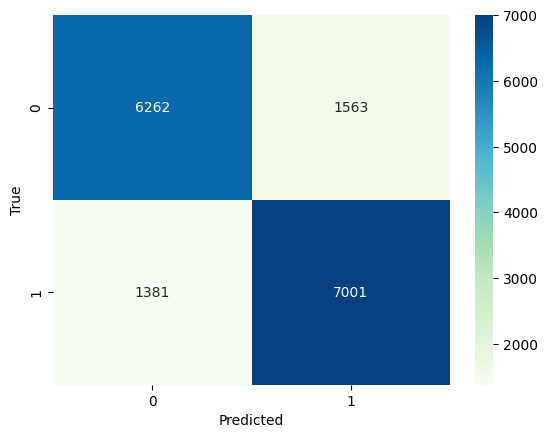

In [ ]:
tabla1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(tabla1,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')


- **Calculo de las metricas**

In [ ]:
def mostrar_metricas(y_test, y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

In [ ]:
mostrar_metricas(y_test1, y_pred1)


Accuracy: 0.8183500956376875
Recall: 0.8352421856358864
Precision: 0.8174918262494162
f1 score: 0.8262716865336952


### Explicacion de las metricas

- Accuracy: Hace referencia a lo cuan cerca esta el resultado de una medicion del valor verdadero, es decir la cantidad de predicciones positivas qeu fueron correctas.

- Recall: Es la tasa de verdaderos positivos, en otras palabras la propocion de casos positivos que fueron correctamente identificados.

- Precision: Hace referencia al porcentaje de casos positivos detectados.

- F1 score: resume las 3 metricas anteriores en ella.

- Prediccion con el dataset de Test

In [ ]:

df_trabajo_test_x1 = df_trabajo_test_dum1.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids1 = df_trabajo_test_dum1['id'].copy()


prediccion1 = model1.predict(df_trabajo_test_x1)

df_prediccion1 = pd.DataFrame({'id': ids1, 'is_canceled': prediccion1})

# df_prediccion1.to_csv('df_prediccion1.csv')
# files.download('df_prediccion1.csv')


Grafico (arreglar func y cortar arbol)

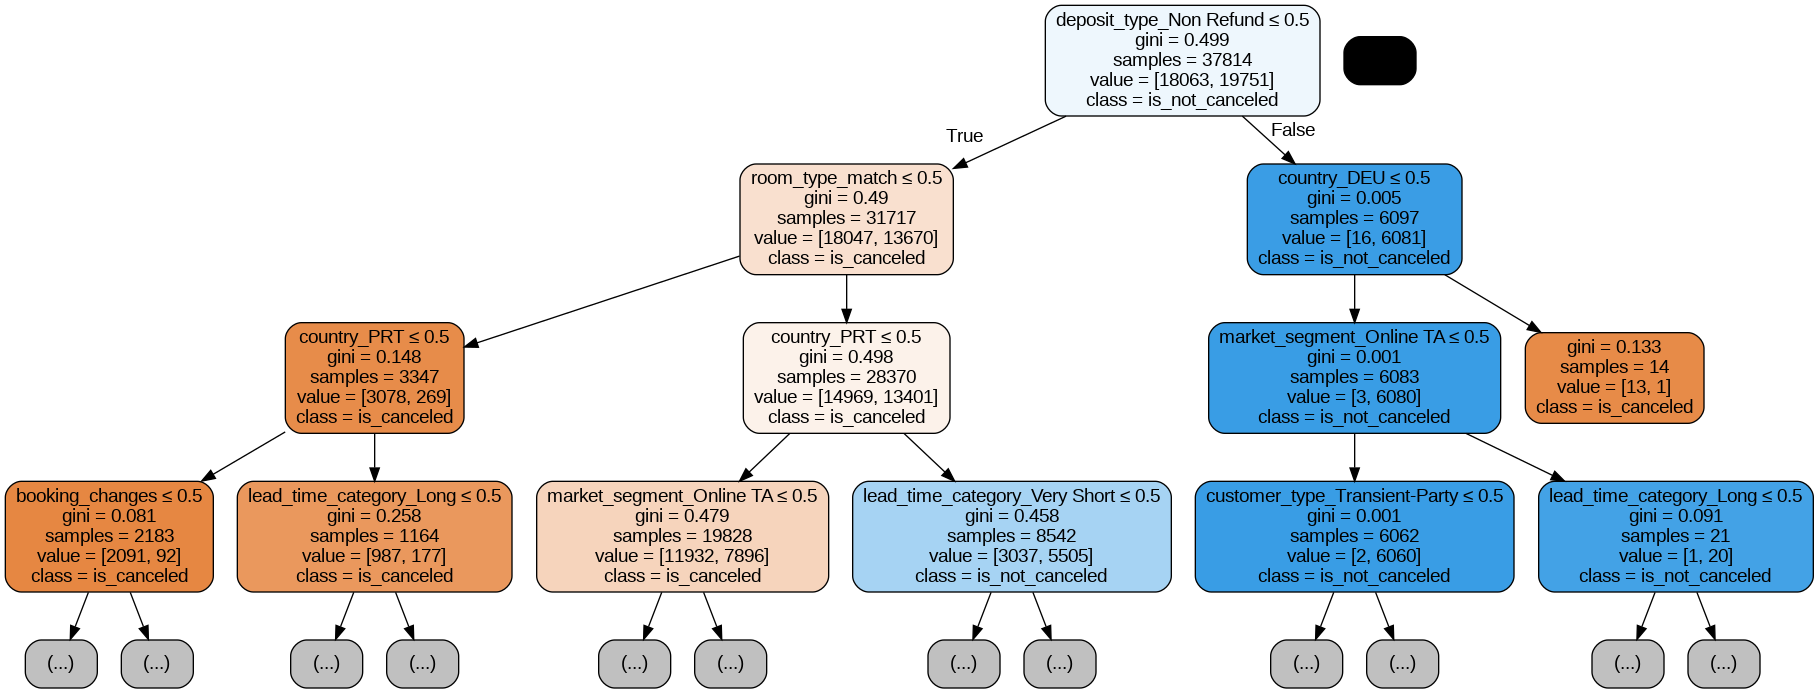

In [ ]:
#Grafico
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True, max_depth=3,
                special_characters=True,
                feature_names=df_trabajo_test_x1.columns.to_list(),
                class_names=['is_canceled','is_not_canceled'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

- Analisis de la importancia de cada feature en al hora de al prediccion

In [ ]:
sorted(list(zip(df_trabajo_test_dum1.columns.to_list(), model1.feature_importances_)), key=lambda x: -x[1])

[('market_segment_otro', 0.31049232096239454),
 ('market_segment_Groups', 0.1309507776836172),
 ('total_of_special_requests', 0.09157550775601499),
 ('room_type_match', 0.08706986857327086),
 ('is_canceled', 0.07394814969865879),
 ('country_IRL', 0.07024918916959347),
 ('required_car_parking_spaces', 0.05344937289305344),
 ('stays_in_weekend_nights', 0.024629350835608552),
 ('days_in_waiting_list_category_Long', 0.022325702741819137),
 ('booking_changes', 0.01802801317244881),
 ('cancel_to_noncancel_ratio', 0.017385045155388055),
 ('days_in_waiting_list_category_Very Long', 0.014253238829879219),
 ('lead_time_category_Short', 0.011443672793140302),
 ('deposit_type_Refundable', 0.009245027799833308),
 ('adults', 0.009159980017985247),
 ('previous_cancellations', 0.007423844569734417),
 ('id', 0.006576103346198896),
 ('country_BRA', 0.00498095904307933),
 ('country_PRT', 0.0046437346408702155),
 ('country_BEL', 0.004627161066837645),
 ('country_GBR', 0.004110287676419183),
 ('lead_time_c

### » Entramiento y prediccion con el segundo modelo de arbol planteado. (Modelo 2, Split)

In [ ]:

df_split_train2 = df_trabajo_train[features1]
df_split_test2= df_trabajo_test[features1]

target = 'is_canceled'


- Verificacion del balanceo de clases

In [ ]:
df_split_train2[target].value_counts(normalize=True)*100

1    52.077896
0    47.922104
Name: is_canceled, dtype: float64

- Evaluacion del dataset

In [ ]:

df_split_train_dum2 = pd.get_dummies(df_split_train2[features1], columns = columns_to_dum1)
df_split_test_dum2 = pd.get_dummies(df_split_test2[features1], columns = columns_to_dum1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(df_split_train_dum2.drop(['id', 'is_canceled'], axis=1).values,
                                                     df_split_train2[target].values,
                                                     test_size=0.3,
                                                     random_state=13,
                                                     stratify=df_split_train2[target].values)



In [ ]:

print('# Datos Entrenamiento: {}'.format(len(x_train2)))
print('# Datos Prueba: {}'.format(len(x_test2)))

for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train2,y_test2]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))


# Datos Entrenamiento: 37814
# Datos Prueba: 16207
% Positivos Entrenamiento: 52.079
% Positivos Prueba: 52.076


Text(50.722222222222214, 0.5, 'True')

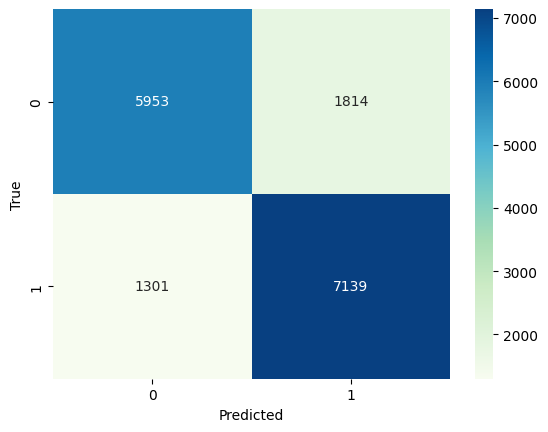

In [ ]:

tree_model2 = tree.DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 13,
                                        min_samples_leaf = 6,
                                        ccp_alpha = 0.001,
                                        min_samples_split= 36)


model2 = tree_model2.fit(X = x_train2, y = y_train2)
y_pred2 = model2.predict(x_test2)


tabla2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(tabla2,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')


In [ ]:
mostrar_metricas(y_test2, y_pred2)

Accuracy: 0.8077990991546863
Recall: 0.8458530805687203
Precision: 0.7973863509438177
f1 score: 0.8209049617662277


In [ ]:
df_split_test2 = df_split_test_dum2.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids2 = df_split_test_dum2['id'].copy()

columnas_faltantes_en_train = set(df_split_test_dum2.columns) - set(df_split_train_dum2.columns)
columnas_faltantes_en_test = set(df_split_train_dum2.columns)- set(df_split_test_dum2.columns)

print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)

prediccion2 = model2.predict(df_split_test2)

df_prediccion2 = pd.DataFrame({'id': ids2, 'is_canceled': prediccion2})

# df_prediccion2.to_csv('df_prediccion2.csv')
# files.download('df_prediccion2.csv')

Columnas faltantes es train: set()
Columnas faltantes es test: set()


## » Muestra del arbol

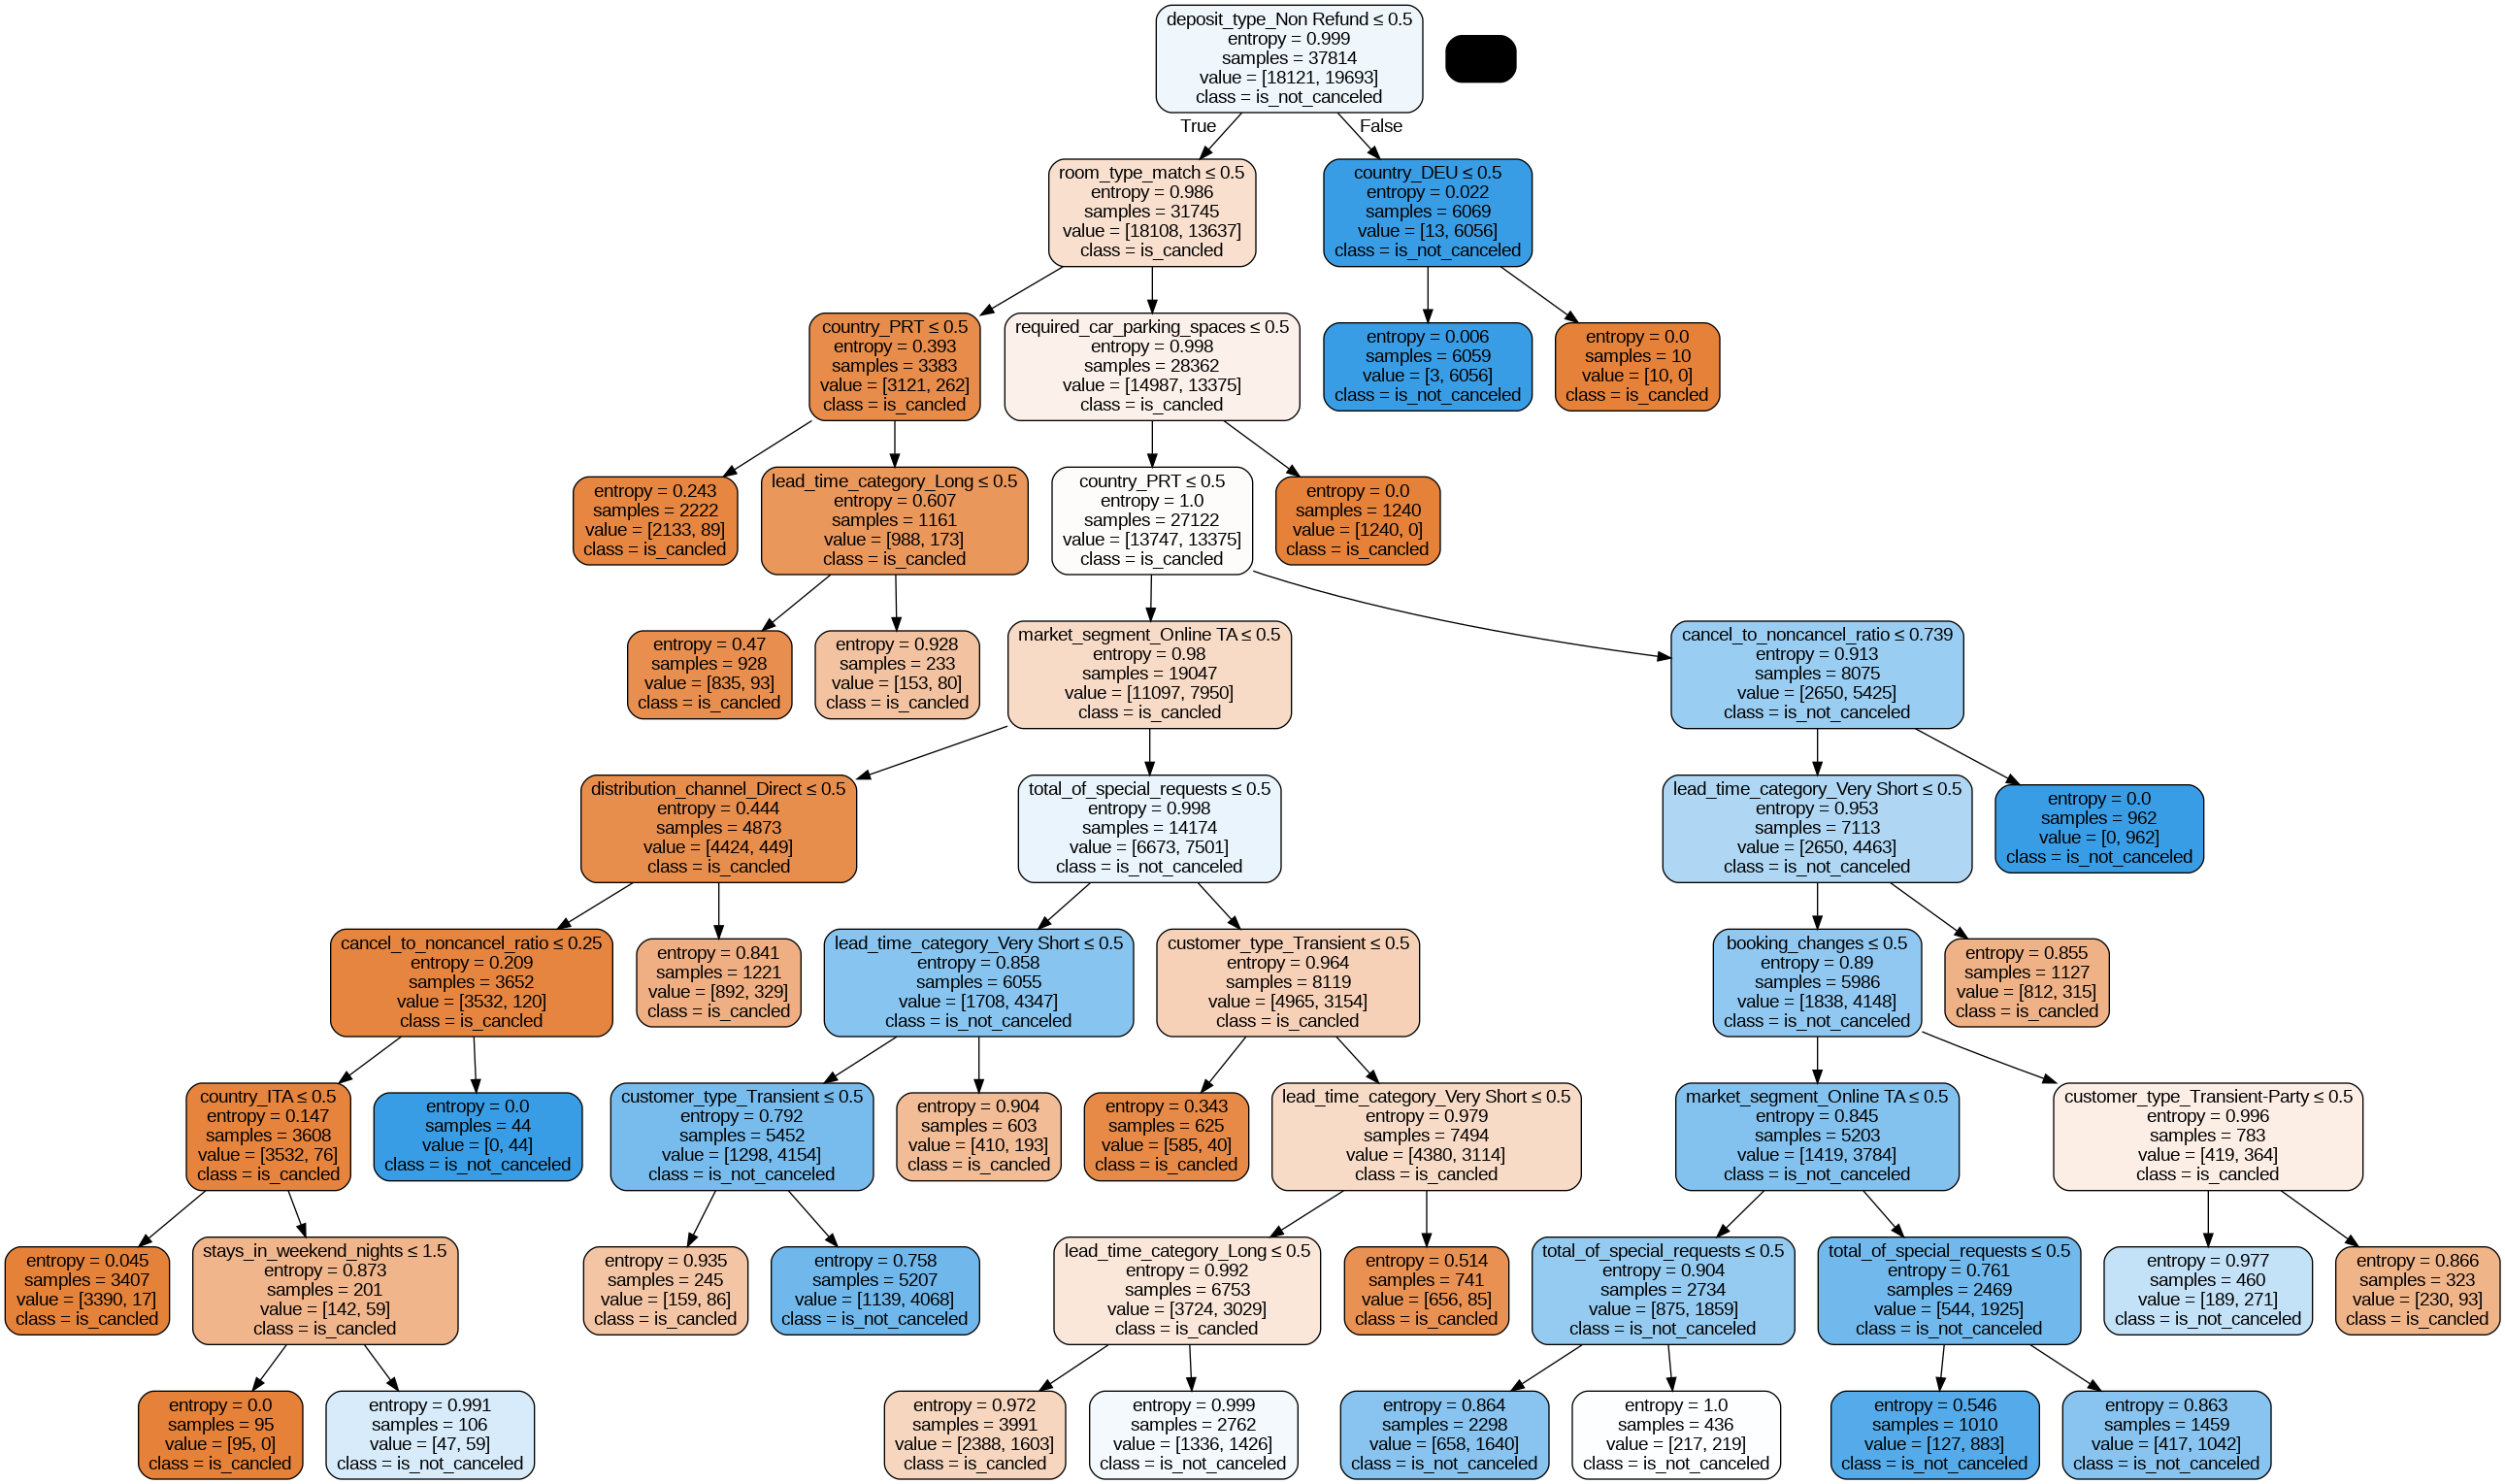

In [ ]:

dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df_split_test2.columns.to_list(),
                class_names=['is_cancled','is_not_canceled'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



## » Optimizacion de parametros con Random Search (Modelo 3)

Seguimos utilizando lo mismo que el modelo 1

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

#Cantidad de combinaciones que quiero porbar
n=15
#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(8,50)),
               'min_samples_split': list(range(8,40)),
               'ccp_alpha':np.linspace(0.0001,0.005,n),
               'max_depth':list(range(1,30))}

#Cantidad de splits para el Cross Validation
folds=10

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train1,y_train1);

In [ ]:
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 37, 'min_samples_leaf': 12, 'max_depth': 18, 'criterion': 'entropy', 'ccp_alpha': 0.0001}
0.823881087585351


In [ ]:
randomcv.cv_results_['mean_test_score']

array([0.80023384, 0.8032785 , 0.80023384, 0.47033434, 0.79989963,
       0.80272324, 0.80401498, 0.81641749, 0.80023384, 0.47033434,
       0.80272324, 0.47030286, 0.82388109, 0.82129073, 0.8030811 ])

In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol3=DecisionTreeClassifier().set_params(**randomcv.best_params_)

arbol3.fit(x_train1,y_train1)

y_pred3= arbol3.predict(x_test1)
mostrar_metricas(y_test1, y_pred3)

Accuracy: 0.8190288147096934
Recall: 0.8335719398711525
Precision: 0.8195894428152493
f1 score: 0.8265215591175253


 ### Cross Validation

In [ ]:
#Entrenamiento con K Fold Cross Validation
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=10)

#Creo árbol con los mejores hiperparámetros
arbolcv4 = DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Selecciono métrica F1-Score
scorer_fn = make_scorer(f1_score)

#Hago CV
resultados = cross_validate(arbolcv4,x_train1, y_train1, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]


In [ ]:
resultados

{'fit_time': array([0.13416839, 0.16129899, 0.12475252, 0.13246822, 0.15133023,
        0.13201523, 0.13558841, 0.12379813, 0.14672565, 0.11970758]),
 'score_time': array([0.00808406, 0.00705981, 0.00710559, 0.00708818, 0.00732923,
        0.00715065, 0.00726318, 0.007622  , 0.00846767, 0.00814462]),
 'estimator': [DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=18,
                         min_samples_leaf=12, min_samples_split=37),
  DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=18,
                         min_samples_leaf=12, min_samples_split=37),
  DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=18,
                         min_samples_leaf=12, min_samples_split=37),
  DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=18,
                         min_samples_leaf=12, min_samples_split=37),
  DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=18,
                   

In [ ]:
metricsCV


array([0.83037722, 0.82755128, 0.82790224, 0.81425322, 0.82506922,
       0.83168806, 0.81248414, 0.83257919, 0.81654402, 0.81998494])

Text(50.722222222222214, 0.5, 'True')

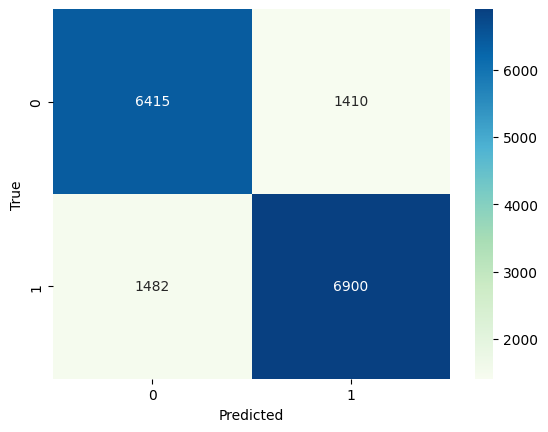

In [ ]:

y_pred4 = mejor_performance.predict(x_test1)

tabla4 = confusion_matrix(y_test1, y_pred4)

sns.heatmap(tabla4,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
mostrar_metricas(y_test1, y_pred4)

Accuracy: 0.8215585857962608
Recall: 0.82319255547602
Precision: 0.8303249097472925
f1 score: 0.8267433501078362


In [ ]:

df_trabajo_test_4 = df_trabajo_test_dum1.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids4 = df_trabajo_test_dum1['id'].copy()


prediccion4 = mejor_performance.predict(df_trabajo_test_4)

df_prediccion4 = pd.DataFrame({'id': ids4, 'is_canceled': prediccion4})

# df_prediccion4.to_csv('df_prediccion4.csv')
# files.download('df_prediccion4.csv')

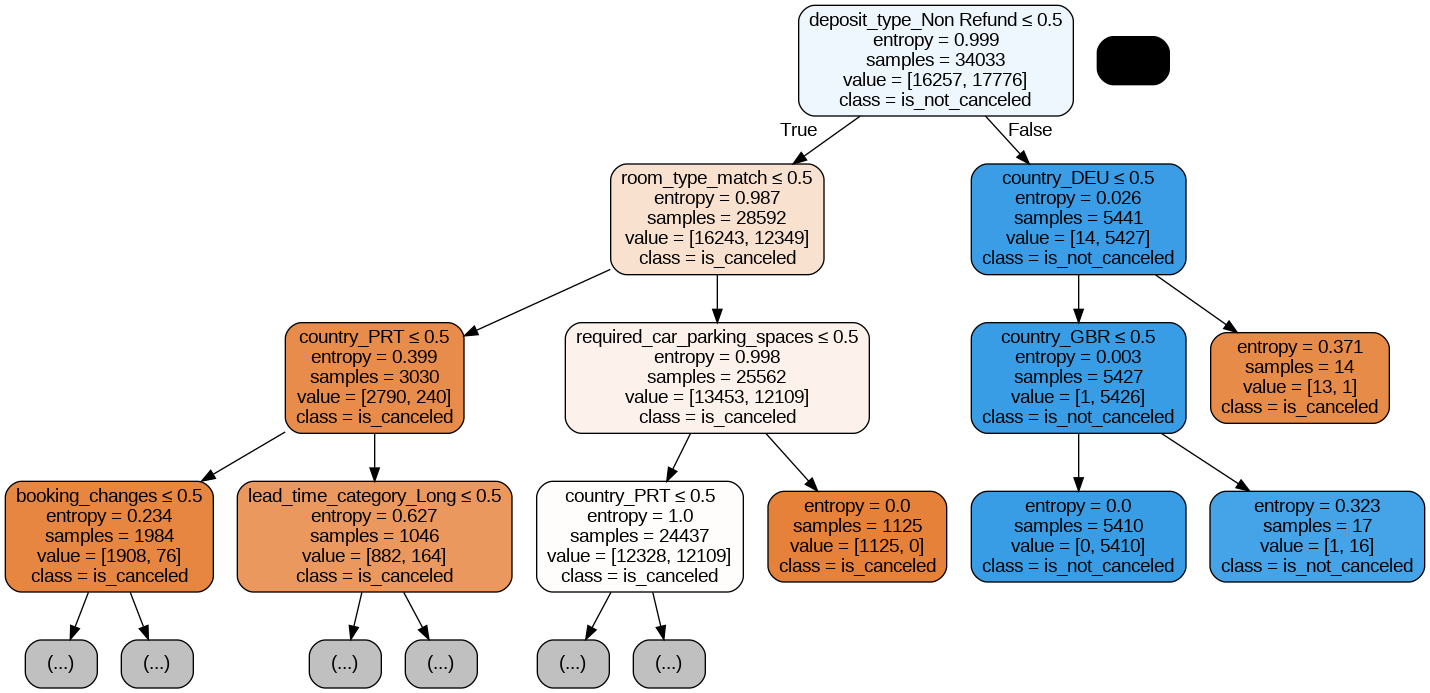

In [ ]:
#Grafico
dot_data = StringIO()
export_graphviz(mejor_performance, out_file=dot_data, max_depth=3,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df_trabajo_test_4.columns.to_list(),
                class_names=['is_canceled','is_not_canceled'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Se utiliza un árbol de decisión para clasificar instancias. Comienza en el nodo raíz y se mueve hacia las hojas. La primera variable considerada es "Deposit_type" debido a su alta importancia. Dependiendo de su valor, la instancia se dirige a la izquierda o derecha. Luego se evalúa "Room_type_match" y “country” respectivamente. En el último nodo, se decide la clase (is_cancel, is_not_cancel) basándose en deposit_type. Cuanto más naranja sea el nodo, mayor es la confianza en la decisión.


In [ ]:
df_trabajo_train_dum1.to_csv('df_trabajo_train_limpio.csv')
files.download('df_trabajo_train_limpio.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>